<div class="alert alert-block alert-success">
<h1>Uniform Flow</h1>
</div>

<p style="font-size:17px; color:black; text-align:justify">
We present the first of a series of elementary incompressible flows that later will be superimposed to synthesize more complex incompressible flows. Consider a uniform flow with velocity $V_\infty$ oriented in the positive $x$ direction:
</p>

<p style="font-size:17px; color:black; text-align:justify">
The stream function for this flow: 
    $$\psi=v_\infty y$$
</p> 

<p style="font-size:17px; color:black; text-align:justify">
The potential function for this flow: 
    $$\phi=v_\infty x$$
</p> 

<p style="font-size:17px; color:black; text-align:justify">
Below are the stream function $\psi$ and potential function $\phi$ plots (1D/2D) in the domain: $(x,y)\in[-10,10]^2$
</p> 

<p style="font-size:17px; color:red; text-align:justify">The last plot is interactive! </p> 

In [14]:
# HIDDEN
# General Purpose
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Jupyter Specifics
from IPython.display import HTML
#from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout


%matplotlib inline
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

In [8]:
# HIDDEN
# Set range
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y)

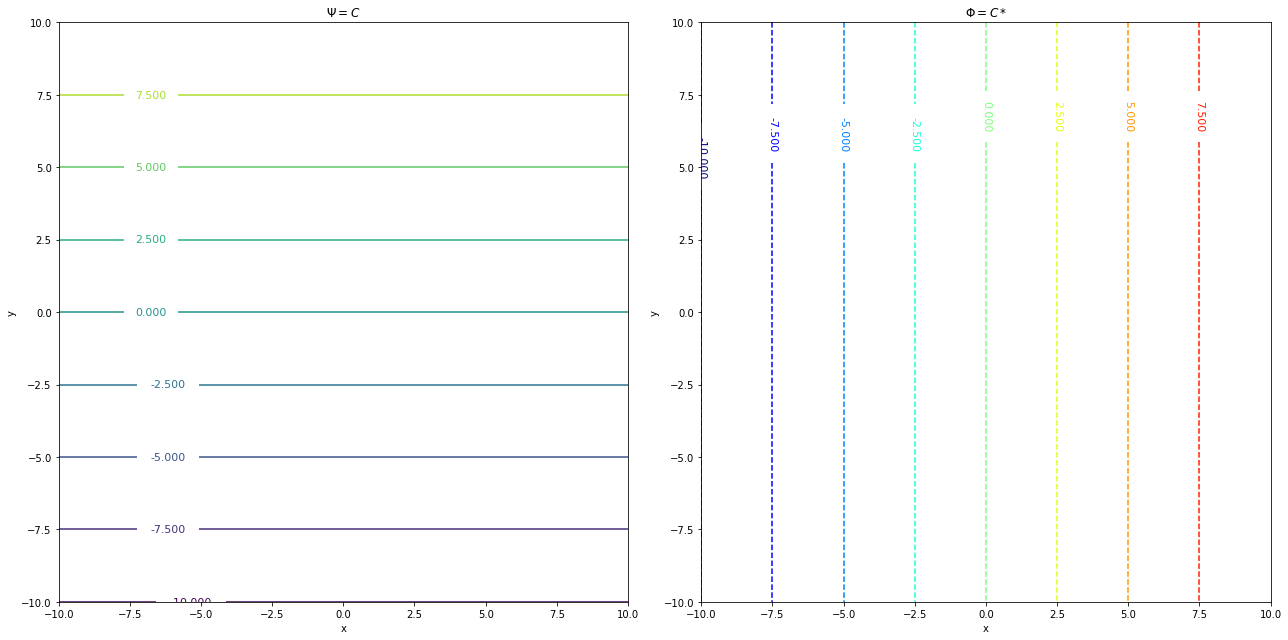

In [9]:
# HIDDEN
# Uniform Flow

# Set freestream velocity
Vinf = 1 # (units: m/s)
plt.rcParams["figure.figsize"] = (18,9)

plt.subplot(1,2,1)
Z = Vinf * Y
CS = plt.contour(X, Y, Z)

plt.clabel(CS, inline=1, fontsize=11)
plt.title('$\Psi=C$')
plt.xlabel('x')
plt.ylabel('y')


plt.subplot(1,2,2)
Z = Vinf * X
CS = plt.contour(X, Y, Z,linestyles='dashed',cmap='jet')
plt.clabel(CS, inline=1, fontsize=11)

plt.title('$\Phi=C*$')
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('uniformPsiPhi.png')
plt.tight_layout()
plt.show()

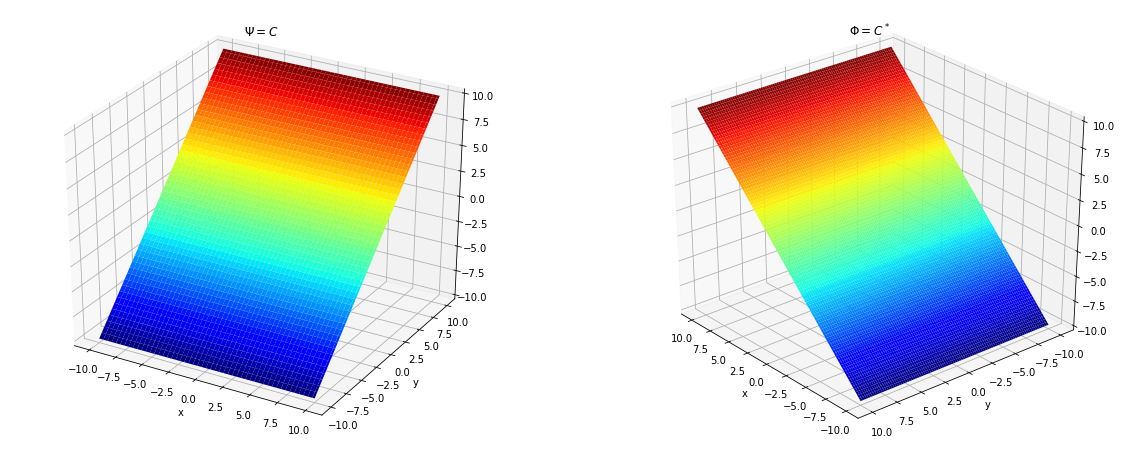

In [10]:
# HIDDEN
# Make data.
 # Set range
plt.rcParams["figure.figsize"] = (20,8)
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y) 

Vinf = 1
Z = Vinf * Y
Z2 = Vinf * X

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
plt.title(r'$\Psi=C$')
plt.xlabel('x')
plt.ylabel('y')

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.jet)
plt.title(r'$\Phi = C^*$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(30, 140)
plt.show()

In [11]:
# HIDDEN
# Uniform Flow interactive chart
def uniformPlot(C, C_star):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
#     plt.rcParams["figure.figsize"] = (15,10)
    fig, ax = plt.subplots(figsize=(15, 10)) 
    
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
    
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)    
    
    Z = Vinf * Y
    CS = plt.contour(X, Y, Z,levels=[C])
    Z = Vinf * X
    CS2 = plt.contour(X, Y, Z,levels=[C_star], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=16)
    linestyles = ['-', '--']
    plt.clabel(CS, inline=1, fontsize=16)
#     plt.title(r'$\Psi=C$  and  $\Phi = C^*$')
    plt.xlabel('x')
    plt.ylabel('y')
#     ax.grid()
    plt.tight_layout()
    plt.show()

In [13]:
# HIDDEN
interact(uniformPlot, C=widgets.IntSlider(value=2,min=-9,max=9,step=1,description=r'$\psi=C$', style=style, layout=slider_layout), 
         C_star=widgets.IntSlider(value=2,min=-9,max=9,step=1,description=r'$\Phi = C^*$', style=style, layout=slider_layout));


interactive(children=(IntSlider(value=2, description='$\\psi=C$', layout=Layout(width='99%'), max=9, min=-9, s…